In [1]:
from src.data_loader import DatabaseConnection

In [2]:
db_connection = DatabaseConnection(
    ssh_host='www.redesign777.tokyo',
    ssh_port=22,
    ssh_user='rddev',
    ssh_password='rdDev@20240521',
    db_host='localhost',
    db_port=3306,
    db_user='rddev',
    db_password='rdSql@20240521',
    db_name='redesign'
)
db_connection.start_tunnel()

2024-07-23 15:33:13,795| ERROR   | Password is required for key C:\Users\yshim/.ssh\id_rsa


SSHトンネルが 53101 にバインドされました。


In [3]:
# クエリを実行
df_frame = db_connection.execute_query("SELECT * FROM re_m_frame")
df_katashiki = db_connection.execute_query("SELECT * FROM re_m_katashiki")
df_pachinko = db_connection.execute_query("SELECT * FROM re_m_katashikidetailpachinko")
df_slot = db_connection.execute_query("SELECT * FROM re_m_katashikidetailslot")
df_katashiki_frame_relation = db_connection.execute_query("SELECT * FROM re_m_katashikiframerelation")
df_maker = db_connection.execute_query("SELECT * FROM re_m_maker")
df_model_evaluation = db_connection.execute_query("SELECT * FROM re_m_modelevaluation")
df_pachinko_type = db_connection.execute_query("SELECT * FROM re_m_pachinkotype")
df_pachinko_type_detail = db_connection.execute_query("SELECT * FROM re_m_pachinkotypedetail")
# SSHトンネルを閉じる
db_connection.close_tunnel()

SSHトンネルを閉じました。


In [4]:
# TODO: ブランド作成のプロセスを作る

In [5]:
#config = configparser.ConfigParser()
#config.read('config.ini')

#ke = keyword_extractor(config['openai']['api_key'])
#df = ke.process(df) # brand_nameのカラムが追加

In [244]:
#import pandas as pd
#df_brand_list = pd.read_csv('brand_lists/brand_list_20200101_20240616.csv')

In [245]:
#len(df_brand_list)

484

In [246]:
#df_brand_list['Name'].nunique()

484

In [6]:
#df_brand_list.head(10)

In [7]:
from src.data_preprocessing import data_preprocessing_operator
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

# start_date :　抽出データ開始日
# end_date : 抽出データ終了日
# openai_api_key : openaiのAPIキー
# use_existing_brand : 既存のブランドデータを使うかどうか
# brand_output_path : 抽出したブランドリストを出力するパス

data_model = data_preprocessing_operator(start_date="2020/01/01 00:00:00",
                                        end_date="2024/06/15 23:59:59",
                                        openai_api_key=config['openai']['api_key'],
                                        use_existing_brand=True,
                                        brand_output_path='brand_lists/brand_list_20200101_20240616.csv')

existing_brand_path = 'brand_lists/brand_list_20200101_20240616.csv'

df = data_model.process( 
                df_frame,
                df_katashiki,
                df_pachinko,
                df_slot,
                df_katashiki_frame_relation,
                df_model_evaluation,
                df_pachinko_type,
                df_pachinko_type_detail, existing_brand_path)

In [8]:
df

,KatashikiId,MakerId,Kind,Name,Price,NairanFlag,TenjiFlag,InspectFlag,KakuhenRate1_1,KakuhenRate1_2,...,ModelLife_90days_mean_per_brand_name,ModelLife_365days_mean_per_brand_name,ModelLife_all_past_mean_per_brand_name,GrossProfit_90days_mean_per_brand_name,GrossProfit_365days_mean_per_brand_name,GrossProfit_all_past_mean_per_brand_name,Color_Encoded,TypeName_Encoded,TypeName_detail_Encoded,brand_name_Encoded
0,P2020121508554101,6,0,PAぱちんこAKB48桜LIGHTver．満開モード搭載MA5,499800,0,0,0,46.3,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,1,6,1,0
1,S2021080911464501,98,1,S ANEMONE FF,478000,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,169,9,5,1
2,S2021020212072301,18,1,S Angel Beats! XF,480000,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,169,9,5,2
3,P2021040518060201,25,0,PAナナシーSPECIAL 3VV,429000,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,117,6,1,3
4,P2023121216410601,11,0,PAフィーバーパワフル R,439900,0,0,0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,86,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,P2022033112193401,31,0,P麻雀物語4 M1AU1Y,459000,0,0,0,50.8,90.8,...,NaN,16.0,16.0,NaN,414858.0,414858.0,44,4,0,317
480,S2020111815092001,7,1,SパチスロKING黄門ちゃま L6,449000,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,169,9,5,318
481,P2022053008143501,2,0,P黄門ちゃま8 L9AZ1,459000,0,0,0,50.0,100.0,...,NaN,NaN,4.0,NaN,NaN,173230.0,85,7,3,318
482,S2022053008163001,7,1,S黄門ちゃま喝2 L1,459000,0,0,0,NaN,NaN,...,8.0,8.0,6.0,269690.0,269690.0,221460.0,169,9,5,318


In [10]:
cols = df.columns.tolist()
targets = [
     'Performance',
     'Spec',
     'Content',
     'News',
     'Concept',
     'Period',
     'SaleUnit_eval',
     'Running',
     'Returns',
     'Price_eval']

features = [col for col in cols if col not in targets + ['Name', 'ModelLife', 'GrossProfit', 'KatashikiId', 'Regist_Date', 'Color', 'TypeName', 'TypeName_detail', 'brand_name']]


In [11]:
print('特徴量の数', len(features))

特徴量の数 160


In [157]:
features

['MakerId',
 'Kind',
 'Price',
 'NairanFlag',
 'TenjiFlag',
 'InspectFlag',
 'KakuhenRate1_1',
 'KakuhenRate1_2',
 'EquivalentBranch',
 'ContinueCountAve',
 'PayCountAve',
 'TamaUnitPrice',
 'SpecId',
 'BonusFlag1_1',
 'BonusValue1_1',
 'BonusFlag1_2',
 'BonusValue1_2',
 'BonusFlag1_3',
 'BonusValue1_3',
 'BonusFlag1_4',
 'BonusValue1_4',
 'BonusFlag1_5',
 'BonusValue1_5',
 'BonusFlag2_1',
 'BonusValue2_1',
 'BonusFlag2_2',
 'BonusValue2_2',
 'BonusFlag2_3',
 'BonusValue2_3',
 'BonusFlag2_4',
 'BonusValue2_4',
 'BonusFlag2_5',
 'BonusValue2_5',
 'BonusFlag3_1',
 'BonusValue3_1',
 'BonusFlag3_2',
 'BonusValue3_2',
 'BonusFlag3_3',
 'BonusValue3_3',
 'BonusFlag3_4',
 'BonusValue3_4',
 'BonusFlag3_5',
 'BonusValue3_5',
 'BonusFlag4_1',
 'BonusValue4_1',
 'BonusFlag4_2',
 'BonusValue4_2',
 'BonusFlag4_3',
 'BonusValue4_3',
 'BonusFlag4_4',
 'BonusValue4_4',
 'BonusFlag4_5',
 'BonusValue4_5',
 'BonusFlag5_1',
 'BonusValue5_1',
 'BonusFlag5_2',
 'BonusValue5_2',
 'BonusFlag5_3',
 'BonusValue

In [172]:
import pandas as pd

df_train = df[df['Regist_Date'] < df['Regist_Date'].min() + pd.DateOffset(days=365*4-90)]
df_test = df[df['Regist_Date'] >= df['Regist_Date'].min() + pd.DateOffset(days=365*4-90)]

print(len(df_train), len(df_test))

405 79


In [173]:
print(df_train['Regist_Date'].min(), df_train['Regist_Date'].max())

2020-01-17 09:15:03 2023-10-17 12:33:32


In [174]:
print(df_test['Regist_Date'].min(), df_test['Regist_Date'].max())

2023-10-23 18:37:01 2024-06-21 10:05:44


In [175]:
print(len(df_train), len(df_test))

405 79


In [66]:
df_train['Kind'].value_counts()

Kind
0    219
1    186
Name: count, dtype: int64

In [67]:
df_test['Kind'].value_counts()

Kind
1    42
0    37
Name: count, dtype: int64

# 日本語訳

In [36]:
#df[['TypeId1', 'TypeId', 'TypeDetailId', 'TypeDetailId1']]

In [37]:
targets

['Performance',
 'Spec',
 'Content',
 'News',
 'Concept',
 'Period',
 'SaleUnit_eval',
 'Running',
 'Returns',
 'Price_eval']

In [38]:
targets_jp = {'Performance' : '演出',
 'Spec' : 'スペック',
 'Content' : 'コンテンツ',
 'News' : '話題性',
 'Concept' : 'コンセプト性',
 'Period' : '時期',
 'SaleUnit_eval' : '販売台数',
 'Running' : '稼働貢献実績',
 'Returns' : '収益貢献実績',
 'Price_eval' : '価格',
 'ModelLife' : '貢献週',
 'GrossProfit':'粗利益'}

features_jp = {'MakerId' : 'メーカーID',
 'Kind' : '種類',
 'Price' : '価格（円）',
 'NairanFlag' : '内覧会フラグ',
 'TenjiFlag' : '展示会フラグ',
 'InspectFlag' : '検定切れフラグ',
 'KakuhenRate1_1' : '確変(突入率)',
 'KakuhenRate1_2' : '確変(継続率)',
 'EquivalentBranch' : '等価',
 'ContinueCountAve' : '継続数平均',
 'PayCountAve' : '払い出し数平均',
 'TamaUnitPrice' : '玉単価',
 'SpecId' : 'スペック名',
 'BonusFlag1_1' : 'ボーナスフラグ1_1',
 'BonusValue1_1' : 'ボーナス値1_1',
 'BonusFlag1_2' : 'ボーナスフラグ1_2',
 'BonusValue1_2': 'ボーナス値1_2',
 'BonusFlag1_3': 'ボーナスフラグ1_3',
 'BonusValue1_3': 'ボーナス値1_3',
 'BonusFlag1_4': 'ボーナスフラグ1_4',
 'BonusValue1_4': 'ボーナス値1_4',
 'BonusFlag1_5': 'ボーナスフラグ1_5',
 'BonusValue1_5': 'ボーナス値1_5',
 'BonusFlag2_1': 'ボーナスフラグ2_1',
 'BonusValue2_1': 'ボーナス値2_1',
 'BonusFlag2_2': 'ボーナスフラグ2_2',
 'BonusValue2_2': 'ボーナス値2_2',
 'BonusFlag2_3': 'ボーナスフラグ2_3',
 'BonusValue2_3': 'ボーナス値2_3',
 'BonusFlag2_4': 'ボーナスフラグ2_4',
 'BonusValue2_4': 'ボーナス値2_4',
 'BonusFlag2_5': 'ボーナスフラグ2_5',
 'BonusValue2_5': 'ボーナス値2_5',
 'BonusFlag3_1': 'ボーナスフラグ3_1',
 'BonusValue3_1': 'ボーナス値3_1',
 'BonusFlag3_2': 'ボーナスフラグ3_2',
 'BonusValue3_2': 'ボーナス値3_2',
 'BonusFlag3_3': 'ボーナスフラグ3_3',
 'BonusValue3_3': 'ボーナス値3_3',
 'BonusFlag3_4': 'ボーナスフラグ3_4',
 'BonusValue3_4': 'ボーナス値3_4',
 'BonusFlag3_5': 'ボーナスフラグ3_5',
 'BonusValue3_5': 'ボーナス値3_5',
 'BonusFlag4_1': 'ボーナスフラグ4_1',
 'BonusValue4_1': 'ボーナス値4_1',
 'BonusFlag4_2': 'ボーナスフラグ4_2',
 'BonusValue4_2': 'ボーナス値4_2',
 'BonusFlag4_3': 'ボーナスフラグ4_3',
 'BonusValue4_3': 'ボーナス値4_3',
 'BonusFlag4_4': 'ボーナスフラグ4_4',
 'BonusValue4_4': 'ボーナス値4_4',
 'BonusFlag4_5': 'ボーナスフラグ4_5',
 'BonusValue4_5': 'ボーナス値4_5',
 'BonusFlag5_1': 'ボーナスフラグ5_1',
 'BonusValue5_1': 'ボーナス値5_1',
 'BonusFlag5_2': 'ボーナスフラグ5_2',
 'BonusValue5_2': 'ボーナス値5_2',
 'BonusFlag5_3': 'ボーナスフラグ5_3',
 'BonusValue5_3': 'ボーナス値5_3',
 'BonusFlag5_4': 'ボーナスフラグ5_4',
 'BonusValue5_4': 'ボーナス値5_4',
 'BonusFlag5_5': 'ボーナスフラグ5_5',
 'BonusValue5_5': 'ボーナス値5_5',
 'BonusFlag6_1': 'ボーナスフラグ6_1',
 'BonusValue6_1': 'ボーナス値6_1',
 'BonusFlag6_2': 'ボーナスフラグ6_2',
 'BonusValue6_2': 'ボーナス値6_2',
 'BonusFlag6_3': 'ボーナスフラグ6_3',
 'BonusValue6_3': 'ボーナス値6_3',
 'BonusFlag6_4': 'ボーナスフラグ6_4',
 'BonusValue6_4': 'ボーナス値6_4',
 'BonusFlag6_5': 'ボーナスフラグ6_5',
 'BonusValue6_5': 'ボーナス値6_5',
 'CoinUnit' : 'コイン単位',
 'GameUnit' : 'ゲーム単位',
 'TypeId' : 'タイプ',
 'TypeDetailId' : 'タイプ詳細',
 'BigRate_extracted_1' : '大当たり確率(通常時)',
 'BigRate_extracted_2' : '大当たり確率(大当り中)',
 'SmallRate_extracted' : '小当たり確率',
 'KakuhenRate1_3_extracted' : '確変(終了確率)',
 'Regist_Date_year' : '登録年度',
 'Regist_Date_month' : '登録月',
 'Regist_Date_days' : '登録日',
 'Performance_90days_mean_per_MakerId' : '演出（メーカIDごと90日平均）',
 'Performance_365days_mean_per_MakerId' : '演出（メーカIDごと365日平均）',
 'Performance_all_past_mean_per_MakerId' : '演出（メーカIDごと全期間平均）',
 'Spec_90days_mean_per_MakerId':'スペック（メーカIDごと90日平均）',
 'Spec_365days_mean_per_MakerId':'スペック（メーカIDごと365日平均）',
 'Spec_all_past_mean_per_MakerId':'スペック（メーカIDごと全期間平均）',
 'Content_90days_mean_per_MakerId' :'コンテンツ（メーカIDごと90日平均）',
 'Content_365days_mean_per_MakerId':'コンテンツ（メーカIDごと365日平均）',
 'Content_all_past_mean_per_MakerId':'コンテンツ（メーカIDごと全期間平均）',
 'News_90days_mean_per_MakerId':'話題性（メーカIDごと90日平均）',
 'News_365days_mean_per_MakerId':'話題性（メーカIDごと365日平均）',
 'News_all_past_mean_per_MakerId':'話題性（メーカIDごと全期間平均）',
 'Concept_90days_mean_per_MakerId':'コンセプト性（メーカIDごと90日平均）',
 'Concept_365days_mean_per_MakerId':'コンセプト性（メーカIDごと365日平均）',
 'Concept_all_past_mean_per_MakerId':'コンセプト性（メーカIDごと全期間平均）',
 'Period_90days_mean_per_MakerId':'時期（メーカIDごと90日平均）',
 'Period_365days_mean_per_MakerId':'時期（メーカIDごと365日平均）',
 'Period_all_past_mean_per_MakerId':'時期（メーカIDごと全期間平均）',
 'SaleUnit_eval_90days_mean_per_MakerId':'販売台数（メーカIDごと90日平均）',
 'SaleUnit_eval_365days_mean_per_MakerId':'販売台数（メーカIDごと365日平均）',
 'SaleUnit_eval_all_past_mean_per_MakerId':'販売台数（メーカIDごと全期間平均）',
 'Running_90days_mean_per_MakerId':'稼働貢献実績（メーカIDごと90日平均）',
 'Running_365days_mean_per_MakerId':'稼働貢献実績（メーカIDごと365日平均）',
 'Running_all_past_mean_per_MakerId':'稼働貢献実績（メーカIDごと全期間平均）',
 'Returns_90days_mean_per_MakerId':'収益貢献実績（メーカIDごと90日平均）',
 'Returns_365days_mean_per_MakerId':'収益貢献実績（メーカIDごと365日平均）',
 'Returns_all_past_mean_per_MakerId':'収益貢献実績（メーカIDごと全期間平均）',
 'Price_eval_90days_mean_per_MakerId':'価格（メーカIDごと90日平均）',
 'Price_eval_365days_mean_per_MakerId':'価格（メーカIDごと365日平均）',
 'Price_eval_all_past_mean_per_MakerId':'価格（メーカIDごと全期間平均）',
 'ModelLife_90days_mean_per_MakerId':'貢献週（メーカIDごと90日平均）',
 'ModelLife_365days_mean_per_MakerId':'貢献週（メーカIDごと365日平均）',
 'ModelLife_all_past_mean_per_MakerId':'貢献週（メーカIDごと全期間平均）',
 'GrossProfit_90days_mean_per_MakerId':'粗利益（メーカIDごと90日平均）',
 'GrossProfit_365days_mean_per_MakerId':'粗利益（メーカIDごと365日平均）',
 'GrossProfit_all_past_mean_per_MakerId':'粗利益（メーカIDごと全期間平均）',
 'Performance_90days_mean_per_brand_name':'演出（ブランド名ごと90日平均）',
 'Performance_365days_mean_per_brand_name':'演出（ブランド名ごと365日平均）',
 'Performance_all_past_mean_per_brand_name':'演出（ブランド名ごと全期間平均）',
 'Spec_90days_mean_per_brand_name':'スペック（ブランド名ごと90日平均）',
 'Spec_365days_mean_per_brand_name':'スペック（ブランド名ごと365日平均）',
 'Spec_all_past_mean_per_brand_name':'スペック（ブランド名ごと全期間平均）',
 'Content_90days_mean_per_brand_name':'コンテンツ（ブランド名ごと90日平均）',
 'Content_365days_mean_per_brand_name':'コンテンツ（ブランド名ごと365日平均）',
 'Content_all_past_mean_per_brand_name':'コンテンツ（ブランド名ごと全期間平均）',
 'News_90days_mean_per_brand_name':'話題性（ブランド名ごと90日平均）',
 'News_365days_mean_per_brand_name':'話題性（ブランド名ごと365日平均）',
 'News_all_past_mean_per_brand_name':'話題性（ブランド名ごと全期間平均）',
 'Concept_90days_mean_per_brand_name':'コンセプト性（ブランド名ごと90日平均）',
 'Concept_365days_mean_per_brand_name':'コンセプト性（ブランド名ごと365日平均）',
 'Concept_all_past_mean_per_brand_name':'コンセプト性（ブランド名ごと全期間平均）',
 'Period_90days_mean_per_brand_name':'時期（ブランド名ごと90日平均）',
 'Period_365days_mean_per_brand_name':'時期（ブランド名ごと365日平均）',
 'Period_all_past_mean_per_brand_name':'時期（ブランド名ごと全期間平均）',
 'SaleUnit_eval_90days_mean_per_brand_name':'販売台数（ブランド名ごと90日平均）',
 'SaleUnit_eval_365days_mean_per_brand_name':'販売台数（ブランド名ごと365日平均）',
 'SaleUnit_eval_all_past_mean_per_brand_name':'販売台数（ブランド名ごと全期間平均）',
 'Running_90days_mean_per_brand_name':'稼働貢献実績（ブランド名ごと90日平均）',
 'Running_365days_mean_per_brand_name':'稼働貢献実績（ブランド名ごと365日平均）',
 'Running_all_past_mean_per_brand_name':'稼働貢献実績（ブランド名ごと全期間平均）',
 'Returns_90days_mean_per_brand_name':'収益貢献実績（ブランド名ごと90日平均）',
 'Returns_365days_mean_per_brand_name':'収益貢献実績（ブランド名ごと365日平均）',
 'Returns_all_past_mean_per_brand_name':'収益貢献実績（ブランド名ごと全期間平均）',
 'Price_eval_90days_mean_per_brand_name':'価格（ブランド名ごと90日平均）',
 'Price_eval_365days_mean_per_brand_name':'価格（ブランド名ごと365日平均）',
 'Price_eval_all_past_mean_per_brand_name':'価格（ブランド名ごと全期間平均）',
 'ModelLife_90days_mean_per_brand_name':'貢献週（ブランド名ごと90日平均）',
 'ModelLife_365days_mean_per_brand_name':'貢献週（ブランド名ごと365日平均）',
 'ModelLife_all_past_mean_per_brand_name':'貢献週（ブランド名ごと全期間平均）',
 'GrossProfit_90days_mean_per_brand_name':'粗利益（ブランド名ごと90日平均）',
 'GrossProfit_365days_mean_per_brand_name':'粗利益（ブランド名ごと365日平均）',
 'GrossProfit_all_past_mean_per_brand_name':'粗利益（ブランド名ごと全期間平均）',
 'Color_Encoded' : '枠色',
 'TypeName_Encoded' : 'タイプ名',
 'TypeName_detail_Encoded' : 'タイプ詳細',
 'brand_name_Encoded': 'ブランド名'}

In [237]:
df[['KakuhenRate1_1','KakuhenRate1_2']]

,KakuhenRate1_1,KakuhenRate1_2
0,46.3,92.6
1,NaN,NaN
2,NaN,NaN
3,0.0,0.0
4,100.0,100.0
...,...,...
532,50.8,90.8
533,NaN,NaN
534,50.0,100.0
535,NaN,NaN


# 一つのモデルにまとめるか、個々のモデリングを行うべきか

### 個々に分けるバージョン

In [39]:
from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor

# シンプルにチューニングなしでトライ
def train(df_train, target):
    model = RandomForestRegressor(random_state=42)
    model.fit(df_train[features], df_train[target])
    return model

In [40]:
targets

['Performance',
 'Spec',
 'Content',
 'News',
 'Concept',
 'Period',
 'SaleUnit_eval',
 'Running',
 'Returns',
 'Price_eval']

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

models = {}
df_output = df_test[['Kind'] + targets].copy()
for target in targets:
    rf = train(df_train, target)
    y_pred = rf.predict(df_test[features])

    df_output[target + '_' + 'pred'] = y_pred
    models[target] = rf

In [42]:
df_output

,Kind,Performance,Spec,Content,News,Concept,Period,SaleUnit_eval,Running,Returns,...,Performance_pred,Spec_pred,Content_pred,News_pred,Concept_pred,Period_pred,SaleUnit_eval_pred,Running_pred,Returns_pred,Price_eval_pred
4,0,2.25,2.50,2.25,1.75,3.00,2.50,2.75,2.25,2.50,...,2.2545,2.4320,2.4845,2.0940,2.7675,2.4830,2.2505,2.7960,2.2555,2.1900
12,0,2.20,2.50,3.00,2.00,2.75,2.50,2.50,2.50,2.25,...,2.3775,2.5715,2.6735,2.2700,2.5905,2.3215,2.4825,2.4775,2.1635,1.3800
14,1,2.25,2.50,2.25,2.50,2.50,2.75,2.50,2.50,2.25,...,2.3450,2.3860,2.5420,2.4885,2.8185,2.5755,2.7750,2.3795,2.1940,1.1875
18,0,2.00,3.00,2.00,2.00,2.50,2.25,3.00,2.70,2.70,...,2.3505,2.5155,2.4565,2.3450,2.6140,2.5545,2.4035,2.4480,2.2630,1.4475
25,0,2.00,2.30,2.25,2.00,3.25,2.25,3.00,2.00,2.50,...,2.2510,2.4750,2.2560,2.1425,2.7560,2.6045,2.6340,2.4415,2.2275,1.2925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,2.25,2.25,2.75,2.00,2.75,2.50,3.00,2.25,2.25,...,2.4765,2.5595,2.5365,2.5825,2.8735,2.7090,2.6920,2.5330,2.3240,0.7550
472,0,2.25,2.70,2.50,2.00,2.75,2.50,2.50,2.25,2.25,...,2.4720,2.4675,2.7340,2.2475,2.5400,2.5655,2.6355,2.6135,2.5810,1.6875
474,0,2.50,2.70,3.00,2.50,3.00,2.50,3.25,2.50,2.50,...,2.3285,2.4725,2.2375,2.6000,2.7110,2.5875,2.6115,2.3845,2.2545,1.1475
475,0,2.20,2.80,2.00,2.50,3.00,2.75,2.25,3.00,2.50,...,2.3650,2.4580,2.5420,2.5445,3.0090,2.6245,2.6940,2.5875,2.4885,1.6700


In [43]:
def round_x(x):
    frac_x = np.round(x % 1, 3)
    
    for d in np.arange(0.05, 1.05, 0.05):
        if d >= frac_x:
            y = d if (d - frac_x <= 0.025) else d - 0.05
            break
    
    x = int(x) + y
    return x

In [44]:
for target in targets:
    df_output[target+'_pred'] = df_output[target+'_pred'].apply(lambda x : round_x(x))

In [45]:
df_output

,Kind,Performance,Spec,Content,News,Concept,Period,SaleUnit_eval,Running,Returns,...,Performance_pred,Spec_pred,Content_pred,News_pred,Concept_pred,Period_pred,SaleUnit_eval_pred,Running_pred,Returns_pred,Price_eval_pred
4,0,2.25,2.50,2.25,1.75,3.00,2.50,2.75,2.25,2.50,...,2.25,2.45,2.50,2.10,2.75,2.50,2.25,2.80,2.25,2.20
12,0,2.20,2.50,3.00,2.00,2.75,2.50,2.50,2.50,2.25,...,2.40,2.55,2.65,2.25,2.60,2.30,2.50,2.50,2.15,1.40
14,1,2.25,2.50,2.25,2.50,2.50,2.75,2.50,2.50,2.25,...,2.35,2.40,2.55,2.50,2.80,2.55,2.75,2.40,2.20,1.20
18,0,2.00,3.00,2.00,2.00,2.50,2.25,3.00,2.70,2.70,...,2.35,2.50,2.45,2.35,2.60,2.55,2.40,2.45,2.25,1.45
25,0,2.00,2.30,2.25,2.00,3.25,2.25,3.00,2.00,2.50,...,2.25,2.45,2.25,2.15,2.75,2.60,2.65,2.45,2.25,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,2.25,2.25,2.75,2.00,2.75,2.50,3.00,2.25,2.25,...,2.50,2.55,2.55,2.60,2.85,2.70,2.70,2.55,2.30,0.75
472,0,2.25,2.70,2.50,2.00,2.75,2.50,2.50,2.25,2.25,...,2.45,2.45,2.75,2.25,2.55,2.55,2.65,2.60,2.60,1.70
474,0,2.50,2.70,3.00,2.50,3.00,2.50,3.25,2.50,2.50,...,2.35,2.45,2.25,2.60,2.70,2.60,2.60,2.40,2.25,1.15
475,0,2.20,2.80,2.00,2.50,3.00,2.75,2.25,3.00,2.50,...,2.35,2.45,2.55,2.55,3.00,2.60,2.70,2.60,2.50,1.65


In [46]:
list_rmse, list_r2 = [], []
list_rmse_p, list_rmse_s = [], []
list_r2_p, list_r2_s = [], []
for target in targets:
    y_actual_p = df_output[df_output['Kind']==0][target]
    y_actual_s = df_output[df_output['Kind']==1][target]

    y_pred_p = df_output[df_output['Kind']==0][target + '_' + 'pred']
    y_pred_s = df_output[df_output['Kind']==1][target + '_' + 'pred']
    
    list_rmse_p.append(np.sqrt(mean_squared_error(y_actual_p, y_pred_p)))
    list_rmse_s.append(np.sqrt(mean_squared_error(y_actual_s, y_pred_s)))
    list_rmse.append(np.sqrt(mean_squared_error(df_output[target], df_output[target+'_pred'])))
    
    list_r2_p.append(r2_score(y_actual_p, y_pred_p))
    list_r2_s.append(r2_score(y_actual_s, y_pred_s))
    list_r2.append(r2_score(df_output[target], df_output[target+'_pred']))
    
# 評価テーブルの作成
df_evals_p = pd.DataFrame()
df_evals_s = pd.DataFrame()
df_evals = pd.DataFrame()

df_evals_p['targets'] = [targets_jp[x] for x in targets]
df_evals_p['決定係数'] = list_r2_p
df_evals_p['RMSE'] = list_rmse_p

df_evals_s['targets'] = [targets_jp[x] for x in targets]
df_evals_s['決定係数'] = list_r2_s
df_evals_s['RMSE'] = list_rmse_s

df_evals['targets'] = [targets_jp[x] for x in targets]
df_evals['決定係数'] = list_r2
df_evals['RMSE'] = list_rmse

df_evals_p.to_csv('評価_パチンコ.csv', index=False)
df_evals_s.to_csv('評価_スロット.csv', index=False)
df_evals.to_csv('評価_総合.csv', index=False)

In [47]:
#df_output[['Performance', 'Performance_pred']].head(20)

In [49]:
df_evals_p

,targets,決定係数,RMSE
0,演出,0.019465,0.249188
1,スペック,-0.029355,0.305136
2,コンテンツ,0.054727,0.436587
3,話題性,-0.068768,0.363634
4,コンセプト性,0.149946,0.375158
5,時期,-0.399734,0.443116
6,販売台数,-0.222590,0.441358
7,稼働貢献実績,0.070304,0.454631
8,収益貢献実績,0.089303,0.500608
9,価格,0.069077,0.927471


In [50]:
df_evals_s

,targets,決定係数,RMSE
0,演出,0.054805,0.266927
1,スペック,0.332534,0.213948
2,コンテンツ,-0.253238,0.610181
3,話題性,0.060976,0.338502
4,コンセプト性,-0.142339,0.423773
5,時期,-0.004009,0.437798
6,販売台数,-0.217514,0.345550
7,稼働貢献実績,0.104872,0.541658
8,収益貢献実績,0.079496,0.560665
9,価格,0.447500,0.974741


In [48]:
df_evals

,targets,決定係数,RMSE
0,演出,0.047271,0.258770
1,スペック,0.138128,0.260659
2,コンテンツ,-0.122715,0.535925
3,話題性,0.028885,0.350497
4,コンセプト性,-0.001596,0.401737
5,時期,-0.158289,0.440296
6,販売台数,-0.219356,0.393339
7,稼働貢献実績,0.097497,0.502777
8,収益貢献実績,0.084212,0.533379
9,価格,0.386520,0.952894


### 一つにまとめるバージョン

In [178]:
# ModelLifeとGrossProfitは除く
target_evals = ['Performance', 'Spec', 'Content', 'News', 'Concept', 'Period',
                'SaleUnit_eval', 'Running', 'Returns', 'Price_eval']

model_AllInOne = train(df_train, target_evals) 

df_output_AllInOne = df_test[target_evals].copy()
dict_evals_AllInOne = {}

for j in range(len(target_evals)):
    y_pred = model_AllInOne.predict(df_test[features])

    df_output_AllInOne[target_evals[j] + '_' + 'pred'] = y_pred[:,j]

    dict_evals_AllInOne[target_evals[j]] = [
    mean_squared_error(df_test[target_evals[j]], y_pred[:,j]),
    r2_score(df_test[target_evals[j]], y_pred[:,j])]

In [179]:
# MSEとR2の値
dict_evals_AllInOne

{'Performance': [0.06941630228758171, 0.1675036783013647],
 'Spec': [0.06368237745098039, 0.11312149626536028],
 'Content': [0.23820579901960784, 0.06343869918951839],
 'News': [0.1281822205882353, 0.01218300423850871],
 'Concept': [0.20835134150326792, -0.12273005779049462],
 'Period': [0.19654935130718953, 0.029333191686189752],
 'SaleUnit_eval': [0.19584455392156863, 0.006495793097843872],
 'Running': [0.36293810620915035, 0.12989993478872008],
 'Returns': [0.35181950980392157, 0.10734443424995255],
 'Price_eval': [1.0347651552287582, 0.3377604850367545]}

# 特徴量の重要度


### 全体

In [51]:
df_fea_eval = pd.DataFrame(columns=['features'], data=features)
for target in targets:
    
    importances = models[target].feature_importances_    
    df_fea_eval = pd.concat([df_fea_eval, pd.DataFrame(columns=[target], data=importances)], axis=1)

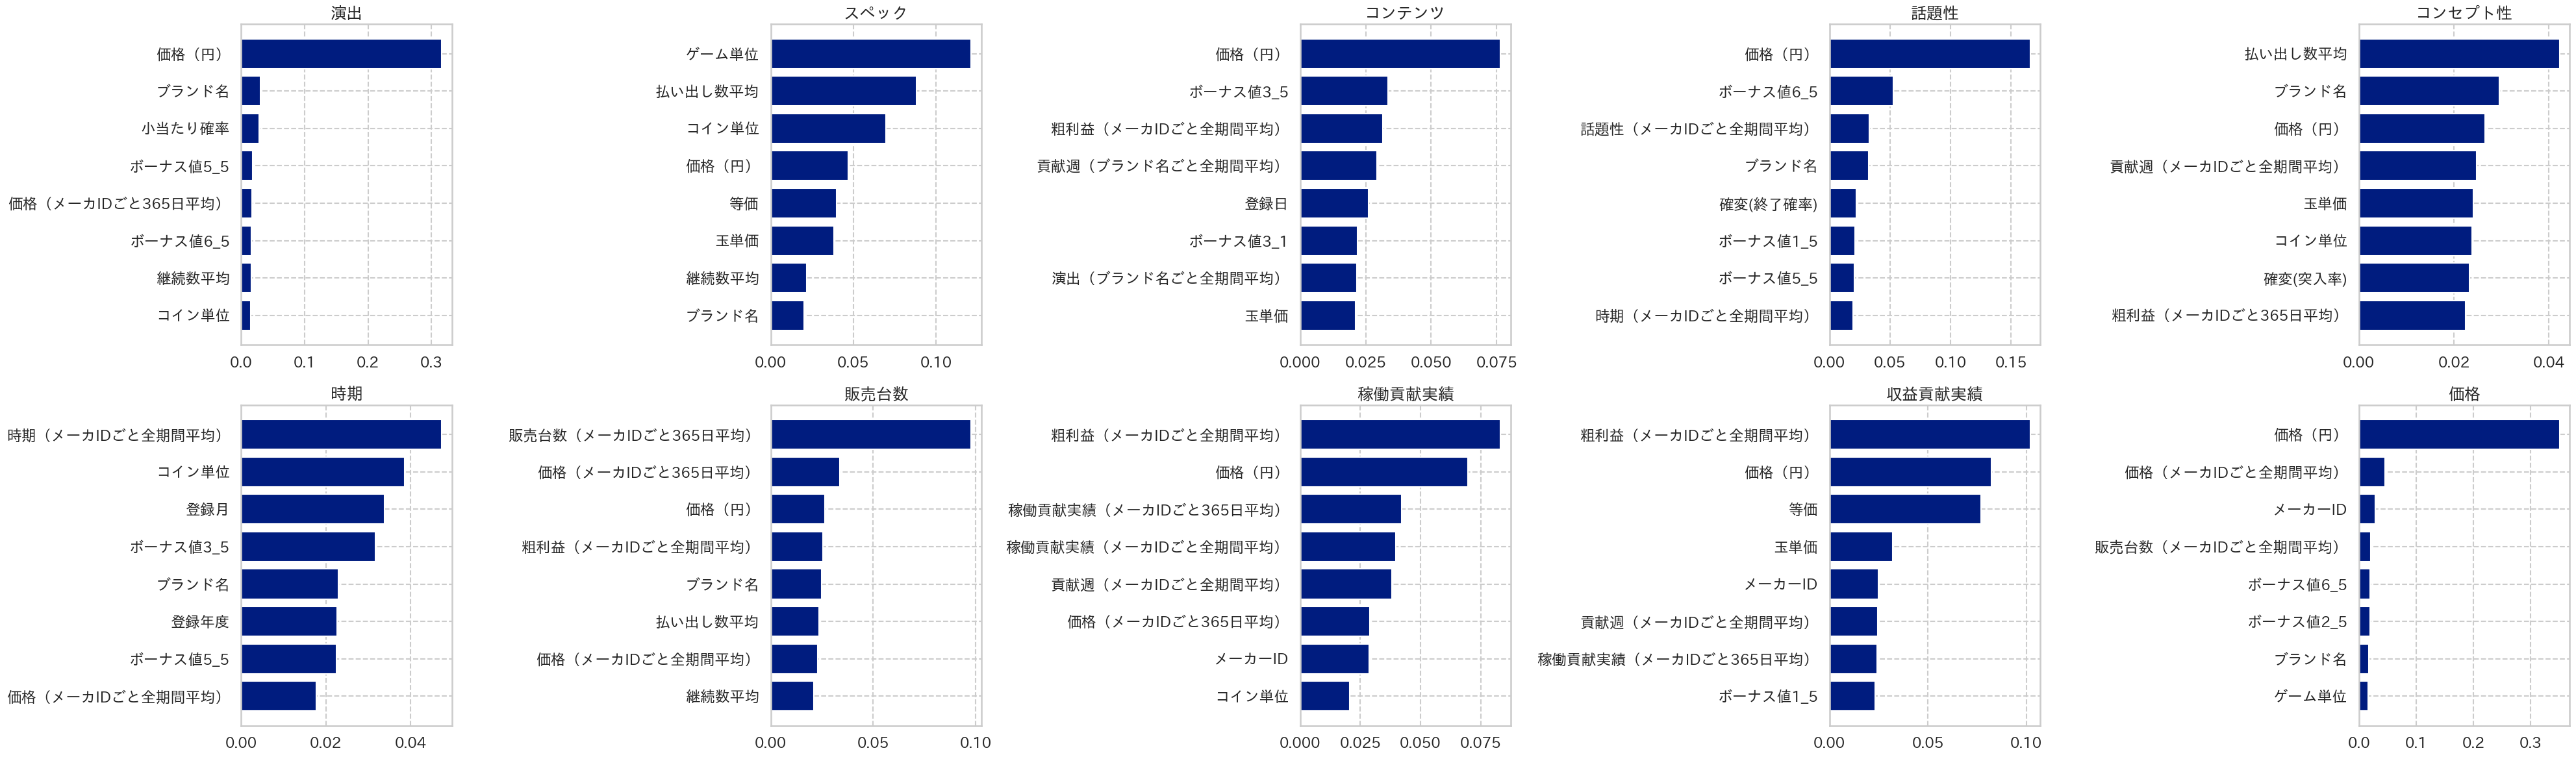

In [52]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.0, rc={"lines.linewidth": 2, 'grid.linestyle': '--'}) 
import japanize_matplotlib
japanize_matplotlib.japanize()

N = 8

fig, axs = plt.subplots(2, 5, figsize=(40, 12))
for ax, target in zip(axs.flatten(), targets):
    
    df_fea_eval = df_fea_eval.sort_values(by=target, ascending=True)
    ax.barh(df_fea_eval['features'].iloc[-N:], df_fea_eval[target].iloc[-N:])
    ax.set_title(targets_jp[target])
    ax.set_yticks(range(N))

    list_features = [features_jp[x] for x in df_fea_eval['features'].iloc[-N:].tolist()]
    
    ax.set_yticklabels(list_features, ha="right") 
fig.tight_layout()
plt.show()

In [186]:
df_fea_eval

,features,Performance,Spec,Content,News,Concept,Period,SaleUnit_eval,Running,Returns,Price_eval
33,BonusFlag3_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25,BonusFlag2_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59,BonusFlag5_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55,BonusFlag5_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61,BonusFlag5_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
0,MakerId,0.007917,0.027959,0.012891,0.015418,0.012645,0.010280,0.013007,0.068195,0.032258,0.019754
104,SaleUnit_eval_all_past_mean_per_MakerId,0.018465,0.008028,0.016102,0.009211,0.009786,0.011720,0.015532,0.022080,0.011180,0.020647
32,BonusValue2_5,0.008997,0.005842,0.005398,0.007261,0.007619,0.009652,0.006231,0.008789,0.013167,0.020711
159,brand_name_Encoded,0.023414,0.027986,0.026310,0.030061,0.031871,0.025380,0.021843,0.025754,0.018810,0.021462


# 分布の確認

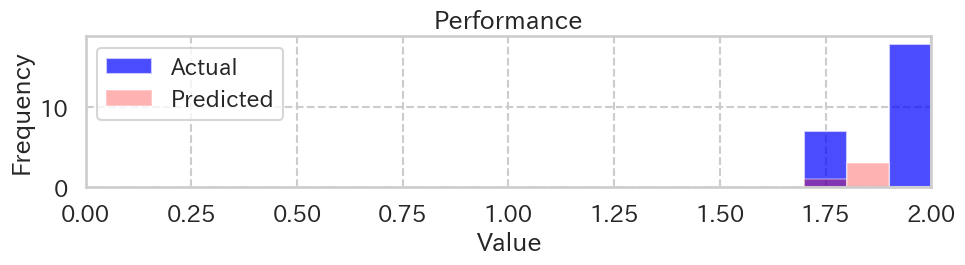

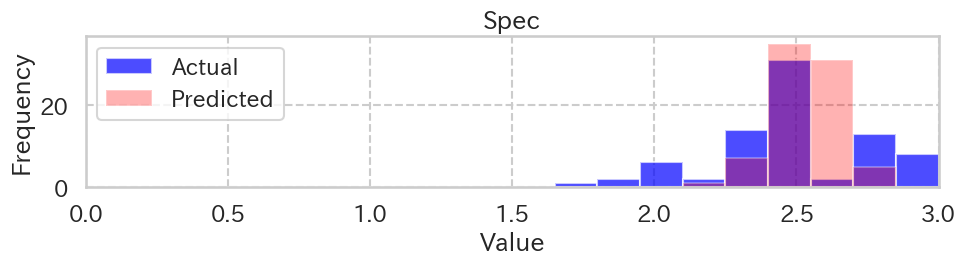

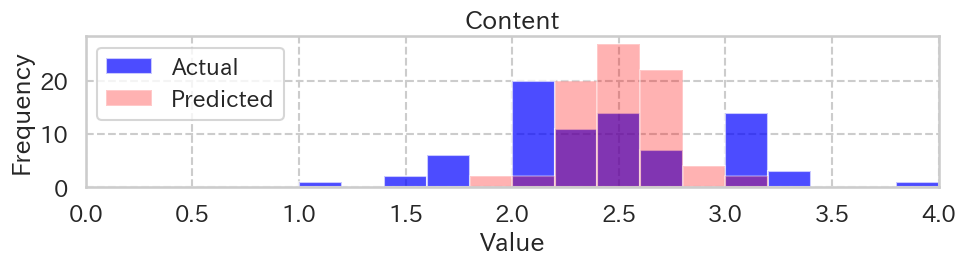

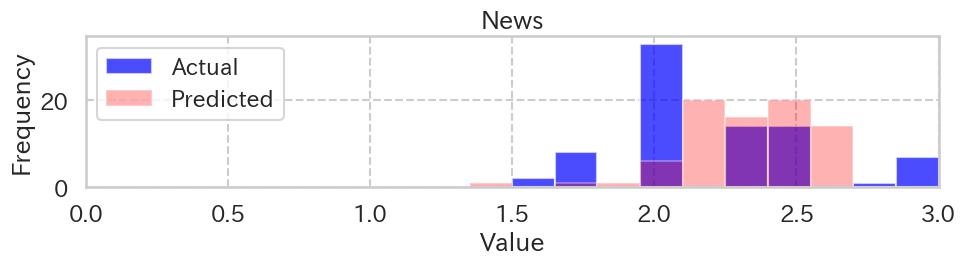

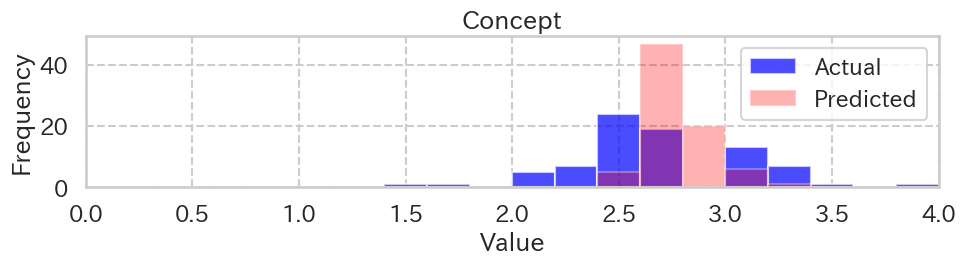

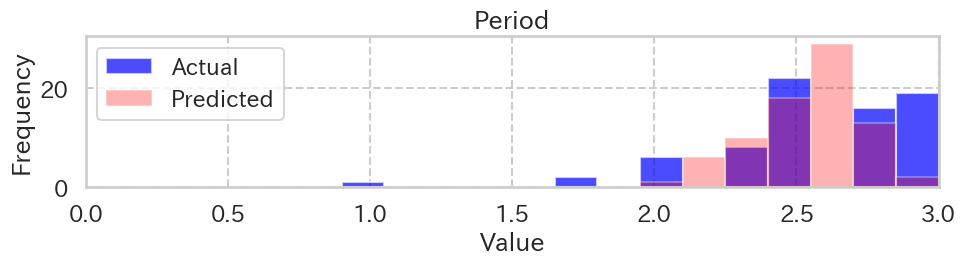

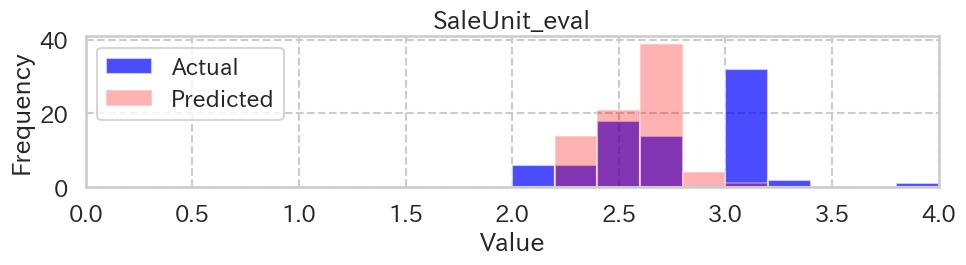

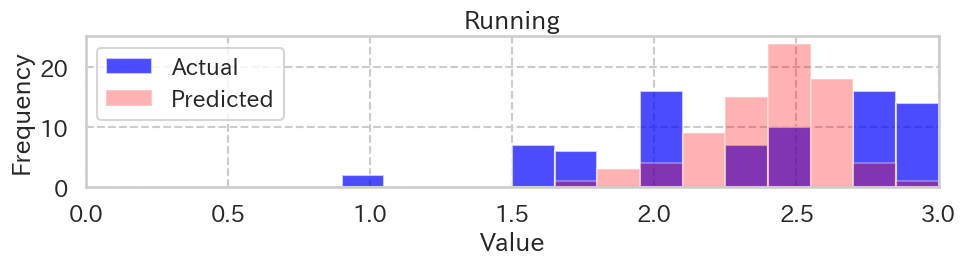

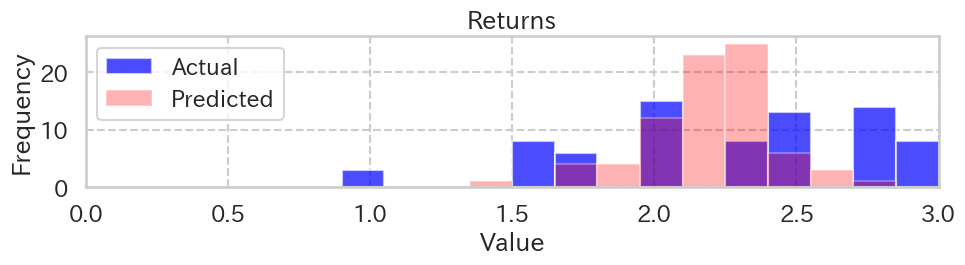

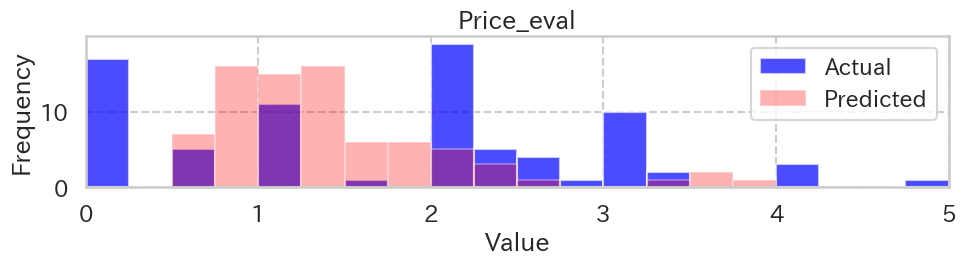

In [62]:
from math import floor

for target in targets:    

    x_max = max(floor(df_output[target].max()), floor(df_output[target + '_pred'].max())) 
    
    plt.figure(figsize=(10, 3))
    plt.hist(df_output[target], bins=20, color='blue', alpha=0.7, range=(0, x_max), label='Actual')
    plt.hist(df_output[target + '_pred'], bins=20, color='red', alpha=0.3, range=(0, x_max), label='Predicted')
    plt.title(target)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim(0, x_max)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 混同行列のような可視化

In [76]:
#!pip install seaborn
#!pip install japanize-matplotlib

#df_output.to_csv('output.csv', index=False)

In [125]:
np.linspace(2, 2.5, 6)


array([2. , 2.1, 2.2, 2.3, 2.4, 2.5])

In [150]:
import numpy as np

def create_confusion_matrix(df, min_value, max_value, N, target):
    #bin_edges = np.arange(min_value, max_value+dx, dx)
    bin_edges = np.linspace(min_value, max_value, N)
    
    bin_labels = [f"({bin_edges[i]}, {bin_edges[i+1]}]" for i in range(len(bin_edges)-1)]
    print(bin_labels)
    
    df[target + '_bin'] = pd.cut(df[target], bins=bin_edges, labels=bin_labels, include_lowest=False)
    df[target + '_pred_bin'] = pd.cut(df[target+'_pred'], bins=bin_edges, labels=bin_labels, include_lowest=False)
    
    confusion_matrix = pd.crosstab(df[target+'_bin'], df[target+'_pred_bin'], rownames=['Actual'], colnames=['Predicted'])
    
    complete_index = pd.Index(bin_labels, name='Actual')
    complete_columns = pd.Index(bin_labels, name='Predicted')
    
    confusion_matrix_full = confusion_matrix.reindex(index=complete_index, columns=complete_columns, fill_value=0)
    confusion_matrix_full = confusion_matrix_full.sort_index(ascending=False)
    
    return confusion_matrix_full

In [145]:
np.linspace(2, 2.5, 6)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5])

### 全体

In [127]:
dict_confusion_matrices = {}
for target in targets:
    dict_confusion_matrices[target] = create_confusion_matrix(df_output,0, 4, 9, target)

In [136]:
dict_confusion_matrices['Performance']

Predicted,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 1.5]","(1.5, 2.0]","(2.0, 2.5]","(2.5, 3.0]","(3.0, 3.5]","(3.5, 4.0]"
Actual,,,,,,,,
"(3.5, 4.0]",0,0,0,0,0,0,0,0
"(3.0, 3.5]",0,0,0,0,0,0,0,0
"(2.5, 3.0]",0,0,0,0,5,2,0,0
"(2.0, 2.5]",0,0,0,1,45,1,0,0
"(1.5, 2.0]",0,0,0,3,22,0,0,0
"(1.0, 1.5]",0,0,0,0,0,0,0,0
"(0.5, 1.0]",0,0,0,0,0,0,0,0
"(0.0, 0.5]",0,0,0,0,0,0,0,0


In [178]:
def single_headmap(ax, confusion_matrix, min_value, max_value, N):
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{targets_jp[title]}スコア")

    labels = np.linspace(min_value, max_value, N)
    ax.plot(range(N), N - 1 - np.array(range(9)), linestyle='--', color='gray')

    ax.set_xticklabels([f"{label:.1f}" for label in labels[1:]], rotation=0)
    ax.set_yticklabels(np.flip([f"{label:.1f}" for label in labels[1:]]))
    
    ax.set_xlabel('予測値')
    ax.set_ylabel('実測値')
    return ax

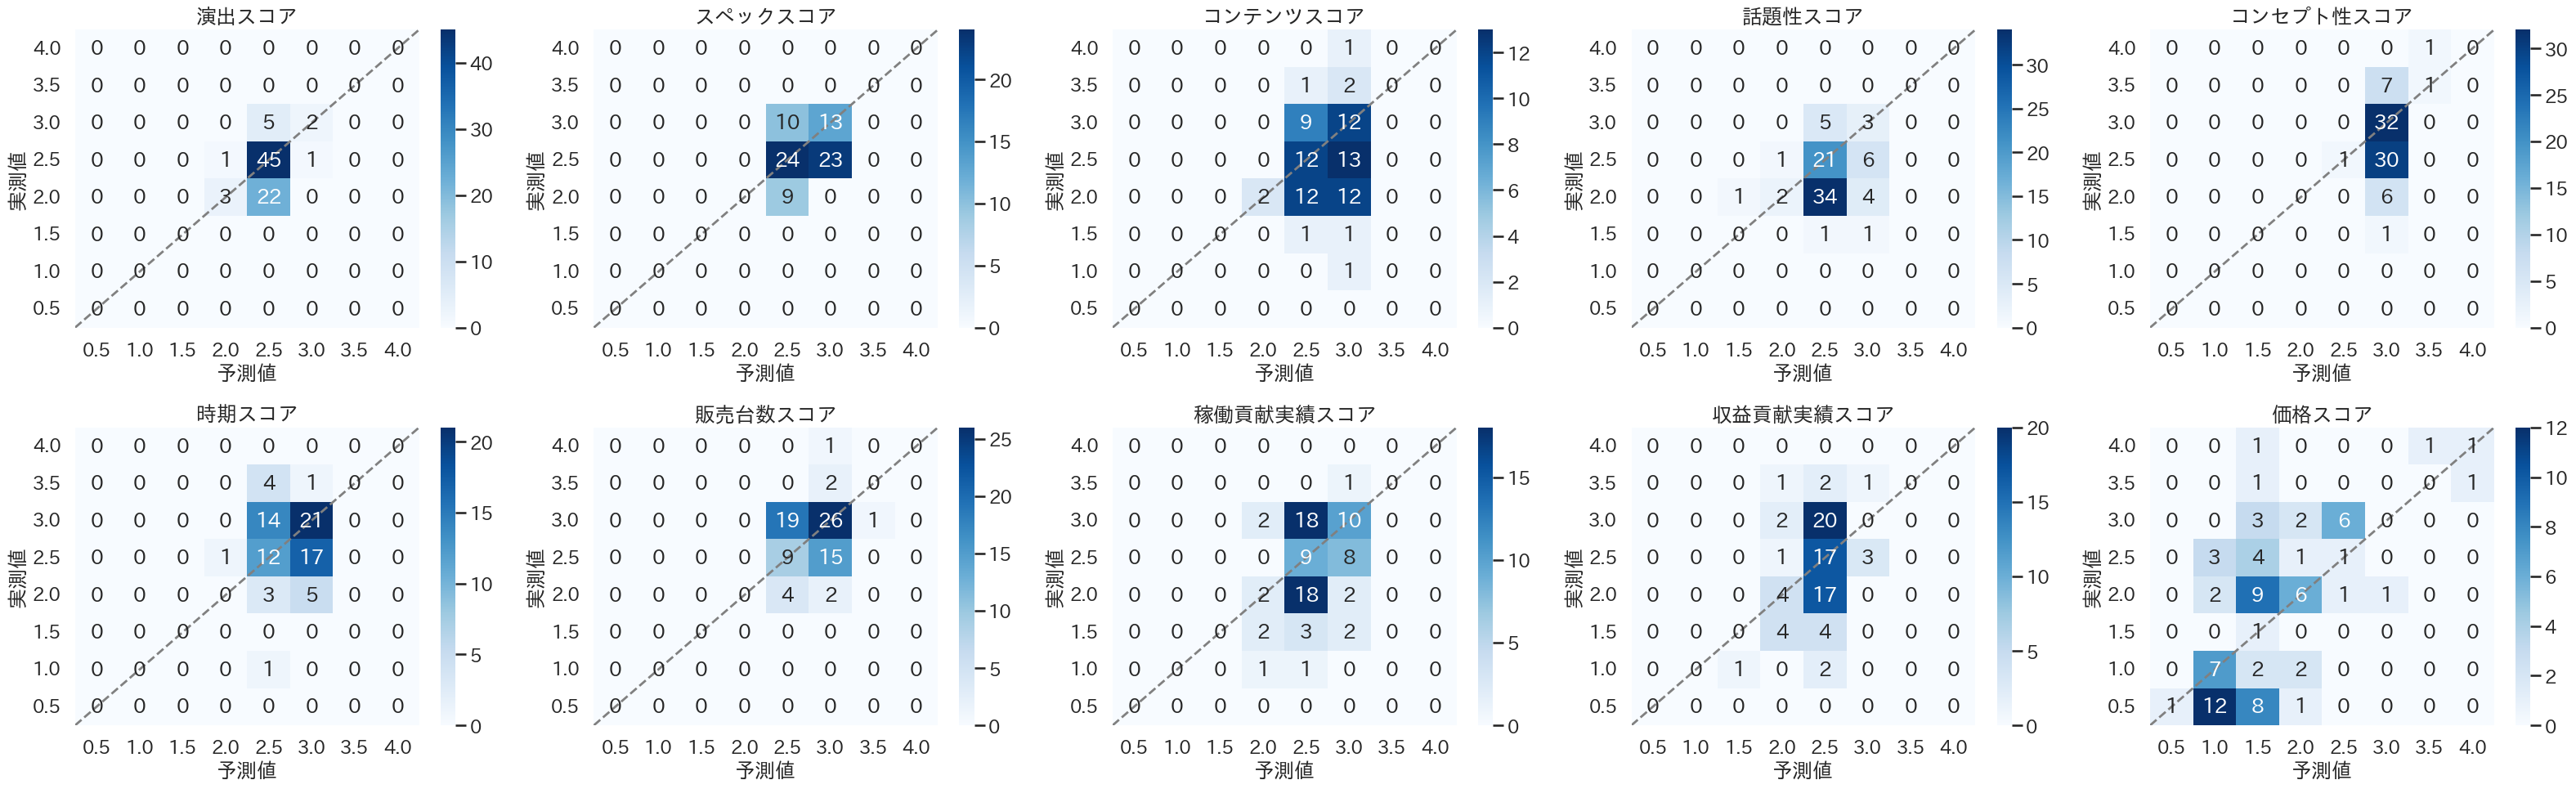

In [179]:
fig, axs = plt.subplots(2, 5, figsize=(32, 10))
for ax, title, confusion_matrix in zip(
    axs.flatten(),
    targets,
    list(dict_confusion_matrices.values())
):
    ax = single_headmap(ax, confusion_matrix, 0, 4, 9)

plt.tight_layout()
plt.show()

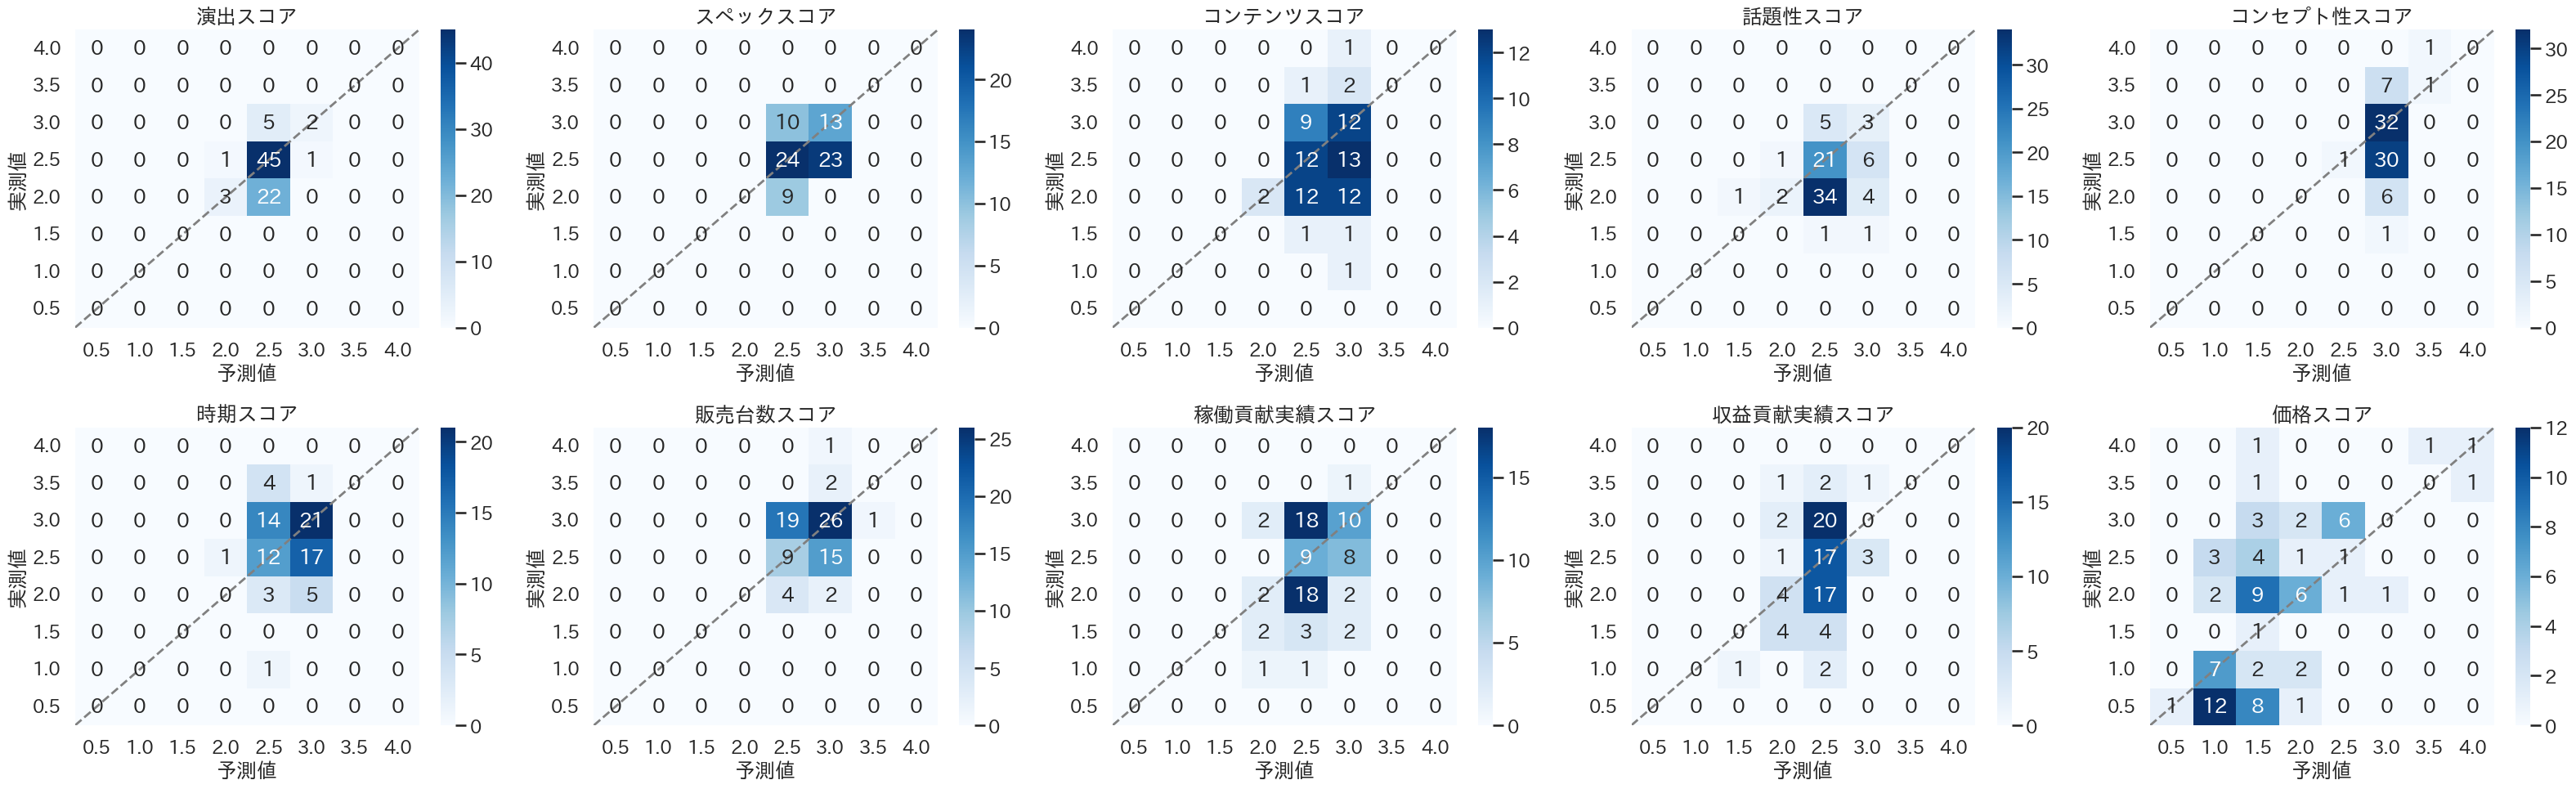

In [152]:
fig, axs = plt.subplots(2, 5, figsize=(32, 10))
for ax, title, confusion_matrix in zip(
    axs.flatten(),
    targets,
    list(dict_confusion_matrices.values())
):
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{targets_jp[title]}スコア")

    # 対角線に線を追加
    x_labels = np.arange(0.5, 4.5, 0.5)
    y_labels = np.arange(0.5, 4.5, 0.5)
    ax.plot(range(9), 9 - 1 - np.array(range(9)), linestyle='--', color='gray')

    ax.set_xticklabels([f"{label:.1f}" for label in x_labels], rotation=0)  # Rotate x-axis labels
    ax.set_yticklabels(np.flip([f"{label:.1f}" for label in y_labels]))
    
    ax.set_xlabel('予測値')
    ax.set_ylabel('実測値')

plt.tight_layout()
plt.show()

In [151]:
create_confusion_matrix(df_output, 2.0, 2.5, 6, 'Performance')

['(2.0, 2.1]', '(2.1, 2.2]', '(2.2, 2.3]', '(2.3, 2.4]', '(2.4, 2.5]']


Predicted,"(2.0, 2.1]","(2.1, 2.2]","(2.2, 2.3]","(2.3, 2.4]","(2.4, 2.5]"
Actual,,,,,
"(2.4, 2.5]",0,1,1,7,9
"(2.3, 2.4]",0,0,0,0,1
"(2.2, 2.3]",0,1,6,9,5
"(2.1, 2.2]",0,1,0,4,0
"(2.0, 2.1]",0,0,0,0,0


In [142]:
len(df_output[(df_output['Performance'] > 2) & 
    (df_output['Performance'] <= 2.5) &
    (df_output['Performance_pred'] > 2) &
    (df_output['Performance_pred'] <= 2.5)])

45

In [147]:
len(df_output[(df_output['Performance'] > 2.0) & 
    (df_output['Performance'] <= 2.1) &
    (df_output['Performance_pred'] > 2.3) &
    (df_output['Performance_pred'] <= 2.4)])

0

In [144]:
create_confusion_matrix(df_output, 2, 2.5, 6, title)


Predicted,"(2.0, 2.1]","(2.1, 2.2]","(2.2, 2.3]","(2.3, 2.4]","(2.4, 2.5]"
Actual,,,,,
"(2.4, 2.5]",0,1,1,7,9
"(2.3, 2.4]",0,0,0,0,1
"(2.2, 2.3]",0,1,6,9,5
"(2.1, 2.2]",0,1,0,4,0
"(2.0, 2.1]",0,2,5,8,1


['(2.0, 2.1]', '(2.1, 2.2]', '(2.2, 2.3]', '(2.3, 2.4]', '(2.4, 2.5]']


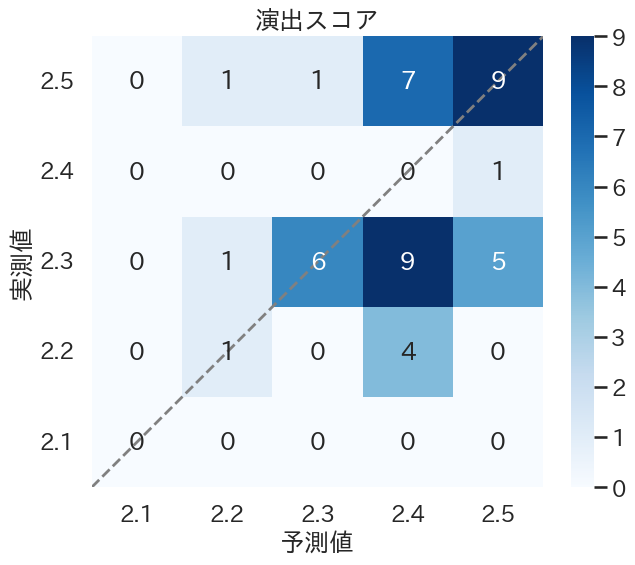

In [155]:
title = 'Performance'

confusion_matrix = create_confusion_matrix(df_output, 2, 2.5, 6, title)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title(f"{targets_jp[title]}スコア")

# 対角線に線を追加
labels = np.linspace(2, 2.5, 6)
n = len(labels)
ax.plot(range(n+1), n - 1 - np.array(range(n+1)), linestyle='--', color='gray')

ax.set_xticklabels([f"{label:.1f}" for label in labels[1:]], rotation=0)
ax.set_yticklabels(np.flip([f"{label:.1f}" for label in labels[1:]]))

ax.set_xlabel('予測値')
ax.set_ylabel('実測値')

plt.tight_layout()
plt.show()

In [154]:
1 + 1 + 7 + 9 + 1 + 1 + 6 + 9 + 5 + 1 + 4 

45

## Performance

In [79]:
import seaborn as sns
import japanize_matplotlib
import numpy as np

def create_heatmap(df_output, x_bin_edges, y_bin_edges, target):
    heatmap_data, xedges, yedges = np.histogram2d(df_output[target + '_pred'], df_output[target], bins=[x_bin_edges, y_bin_edges])
    #print(heatmap_data)
    heatmap_data = heatmap_data.astype(int)
    
    plt.figure(figsize=(9, 6)) 
    ax = sns.heatmap(heatmap_data.T[::-1], cmap='Blues', annot=True, fmt="d", cbar_kws={'label': 'Count'})
    ax.set_aspect('equal')
    
    x_tick_labels = [f"{xedges[i+1]:.1f}" for i in range(len(xedges)-1)]
    y_tick_labels = np.flip([f"{yedges[i+1]:.1f}" for i in range(len(yedges)-1)])
    
    ax.set_xticks(np.arange(len(x_tick_labels)) + 0.5) 
    ax.set_yticks(np.arange(len(y_tick_labels)) + 0.5) 
    ax.set_xticklabels(x_tick_labels)
    ax.set_yticklabels(y_tick_labels, rotation=0)
    n = len(x_tick_labels)
    ax.plot(range(n+1), n  - np.array(range(n+1)), linestyle='--', color='gray')
    
    #plt.title(target + ':' + '実績値 vs. 予測')
    #plt.xlabel('予測')
    #plt.ylabel('実績')
    plt.show()

    return heatmap_data

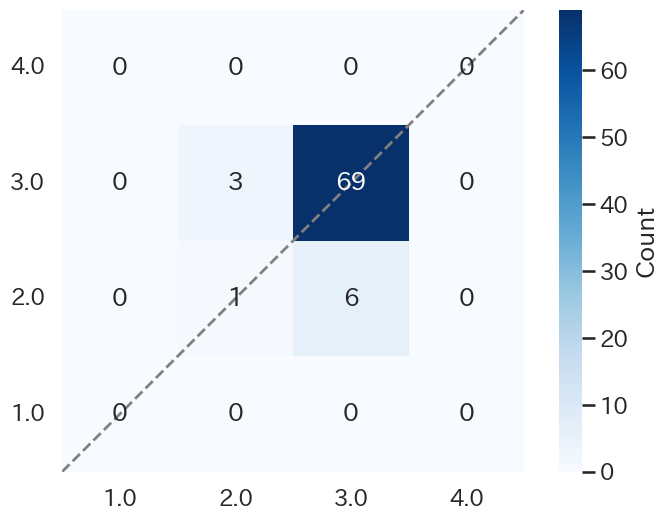

array([[ 0,  0,  0,  0],
       [ 0,  1,  3,  0],
       [ 0,  6, 69,  0],
       [ 0,  0,  0,  0]])

In [80]:
target = 'Performance'

x_bin_edges = np.array([0, 1, 2, 3, 4]) 
y_bin_edges = np.array([0, 1, 2, 3, 4])  

create_heatmap(df_output, x_bin_edges, y_bin_edges, target)

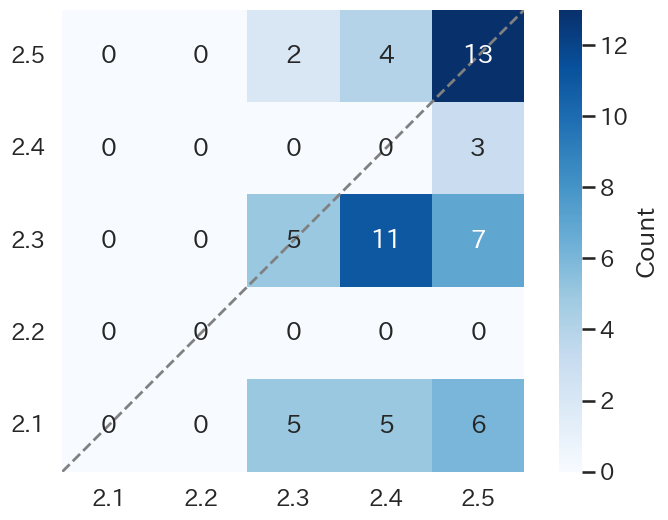

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 5,  0,  5,  0,  2],
       [ 5,  0, 11,  0,  4],
       [ 6,  0,  7,  3, 13]])

In [81]:
target = 'Performance'

x_bin_edges = np.array([2, 2.1, 2.2, 2.3, 2.4, 2.5]) 
y_bin_edges = np.array([2, 2.1, 2.2, 2.3, 2.4, 2.5])  

create_heatmap(df_output, x_bin_edges, y_bin_edges, target)

In [68]:
2 + 4 + 13 + 3 + 5 + 11 + 7 + 5 + 5 + 6

61